# Part 1: Using Gradient Descent to Solve Linear Regression

In this part of the lab, you will be requested to solve the linear regression problem using gradient descent. This means you will not use the closed form solution of linear regression to find the model's parameters, but gradient descent.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

For this exercise we will use some dummy data.

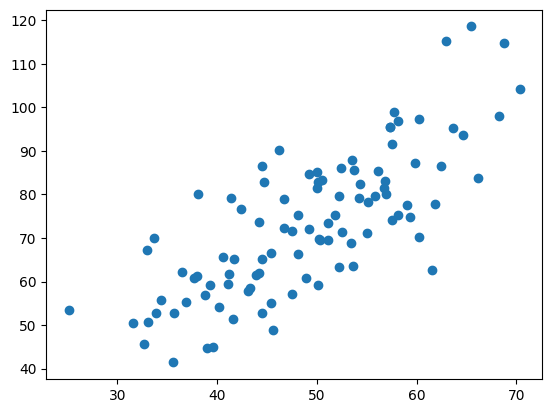

In [4]:
# We will use some dummy data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

#Use a friendly format for X and y
X = X.to_numpy().reshape(-1,1)
y = Y.to_numpy().reshape(-1,1)

The data seems to follow a linear model of order one. Hence, we will try to fit the following linear regression model:
\begin{equation}
\hat{y} = \mathbf{w}^{T}\mathbf{x} + w_0
\end{equation}

Let us recall that for linear regression, we use the sum of squares loss function:
\begin{equation}
\mathcal{L} = \dfrac{1}{N}\sum_{i=1}^N(y_i - \hat{y})^2
\end{equation}

### Exercise 1: Implement the gradient descent function
You will need to complete the gradient descent function for linear regression.

In [23]:
def gradient_descent(alpha, epochs, epsilon, X, y):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''

    #Initialize weights
    weights = np.zeros((X.shape[1]+1,1))

    #Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1/N)
    prev_gradient = 0
    for e in range(epochs):

        #1) Estimate y_hat
        y_hat = np.dot(X,weights)

        #2) Estimate the gradient
        gradient = -2 * inv_N * np.dot(X.T,(y - y_hat))
        gradient_norm = np.linalg.norm(gradient)

       # print ('Epoch ', e, ' weights: ', weights, 'gradient_norm: ', gradient_norm)

        #3) Check the stopping criterion
        if np.abs(gradient_norm - prev_gradient) <= epsilon:
            print(f'Stopped at epoch {e} due to convergence.')
            break

        #4) Update weights
        weights = weights + 2 * alpha * inv_N * np.dot(X.T,(y - y_hat))

        #5) Update previous gradient
        prev_gradient = gradient_norm

    return weights


Now, test your implementation:

In [20]:
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = gradient_descent(alpha, epochs, 0.00001, X, y)

Epoch  0  weights:  [[0.]
 [0.]] gradient_norm:  7425.77657980508
Epoch  1  weights:  [[0.0146299 ]
 [0.74243353]] gradient_norm:  3703.361244079926
Epoch  2  weights:  [[0.02196252]
 [1.11269705]] gradient_norm:  1846.929402844237
Epoch  3  weights:  [[0.02565587]
 [1.29735306]] gradient_norm:  921.0953494141263
Epoch  4  weights:  [[0.02753425]
 [1.38944344]] gradient_norm:  459.36636312599336
Epoch  5  weights:  [[0.02850748]
 [1.43536977]] gradient_norm:  229.09469222476093
Epoch  6  weights:  [[0.02902929]
 [1.45827329]] gradient_norm:  114.25516148926222
Epoch  7  weights:  [[0.02932597]
 [1.46969496]] gradient_norm:  56.984479905883845
Epoch  8  weights:  [[0.02951038]
 [1.47539042]] gradient_norm:  28.426118721057215
Epoch  9  weights:  [[0.02963879]
 [1.47823013]] gradient_norm:  14.19059349285071
Epoch  10  weights:  [[0.02973928]
 [1.47964563]] gradient_norm:  7.10510126450725
Epoch  11  weights:  [[0.02982583]
 [1.48035084]] gradient_norm:  3.5990524904816272
Epoch  12  wei

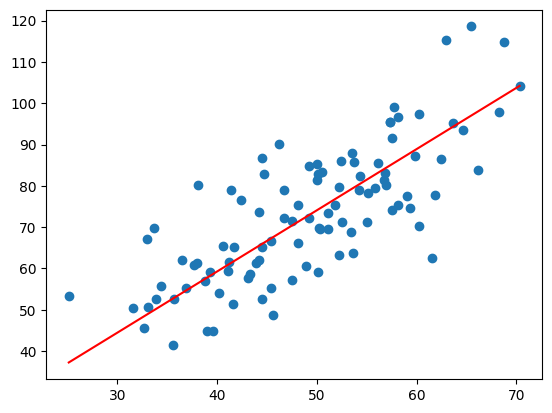

In [8]:
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

### Question 1: Stopping criterion
Explain what is being done at steps 3 and 5 of the code.

**Step 3: Check the stopping criterion**

This step ensures the gradient descent algorithm stops early if further updates to the weights are unlikely to meaningfully reduce the loss.

The algorithm compares the change in gradient norm between the current and previous iterations (∣gradient_norm−prev_gradient∣).
If the change is less than a small threshold value ϵ, it assumes the weights are converging (i.e., the loss function has nearly reached a minimum), and the loop exits using the break statement.

This prevents unnecessary iterations once the weights stabilize, saving computation and ensuring the algorithm efficiently reaches a solution.

**Step 5: Update the previous gradient**

This step updates the variable prev_gradient to store the gradient norm calculated in the current iteration.

It prepares for the next iteration, where the difference between the new gradient norm (gradient_norm) and the previous one (prev_gradient) will be checked again in Step 3.

Without this update, the algorithm wouldn't have the previous gradient value to compare against in the next iteration, making the stopping criterion in Step 3 ineffective.

### Exercise 2: Hyper-parameters
Play a bit with the learning rate (alpha), the number of epochs and the stopping criterion. What can you say about the influence these have on your results? Make sure you document all your experiments.

Testing Different Learning Rates:


<ipython-input-23-49bef05840c1>:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
<ipython-input-23-49bef05840c1>:40: RuntimeWarning: invalid value encountered in add
  weights = weights + 2 * alpha * inv_N * np.dot(X.T,(y - y_hat))


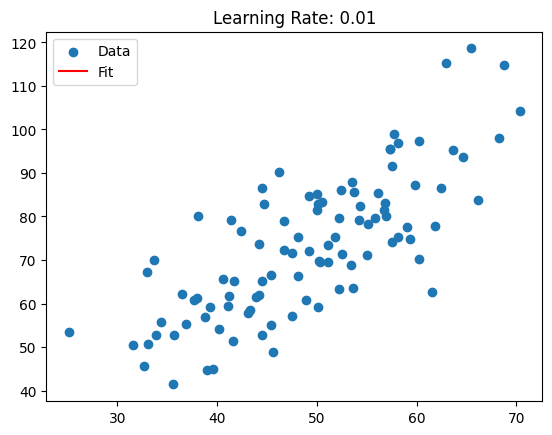

<ipython-input-23-49bef05840c1>:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
<ipython-input-23-49bef05840c1>:40: RuntimeWarning: invalid value encountered in add
  weights = weights + 2 * alpha * inv_N * np.dot(X.T,(y - y_hat))


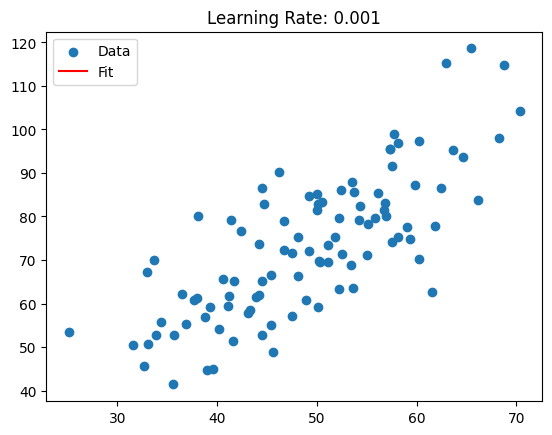

Stopped at epoch 261 due to convergence.


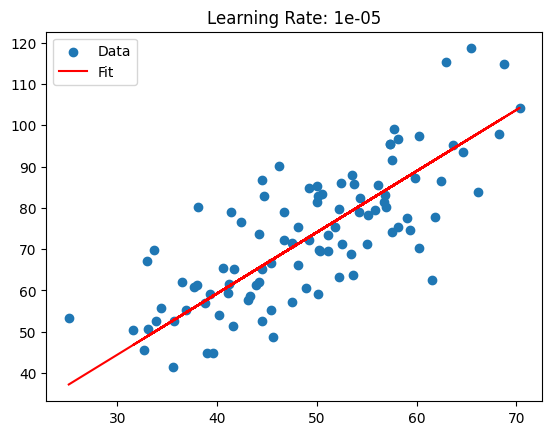

Testing Different Epochs:


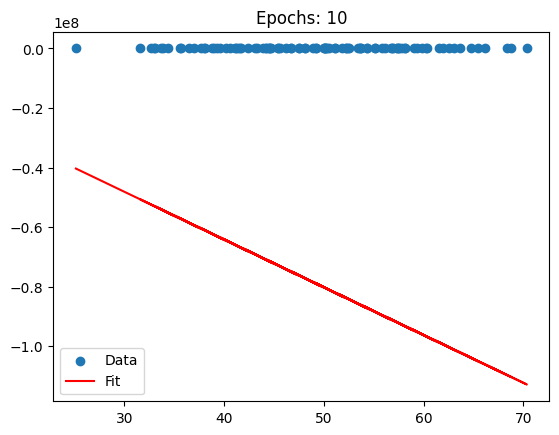

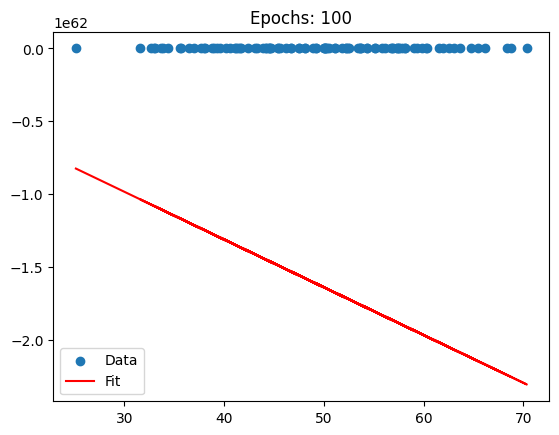

<ipython-input-23-49bef05840c1>:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
<ipython-input-23-49bef05840c1>:40: RuntimeWarning: invalid value encountered in add
  weights = weights + 2 * alpha * inv_N * np.dot(X.T,(y - y_hat))


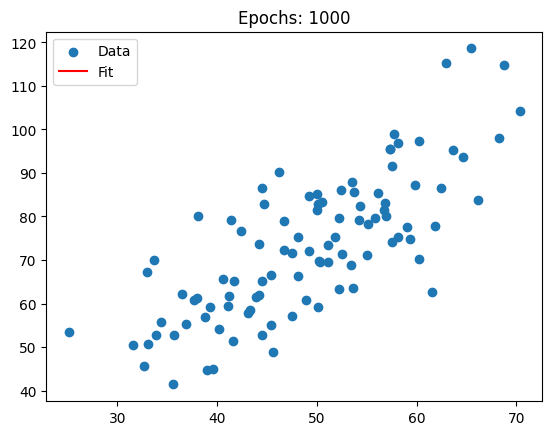

Testing Different Stopping Criteria:


<ipython-input-23-49bef05840c1>:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
<ipython-input-23-49bef05840c1>:40: RuntimeWarning: invalid value encountered in add
  weights = weights + 2 * alpha * inv_N * np.dot(X.T,(y - y_hat))


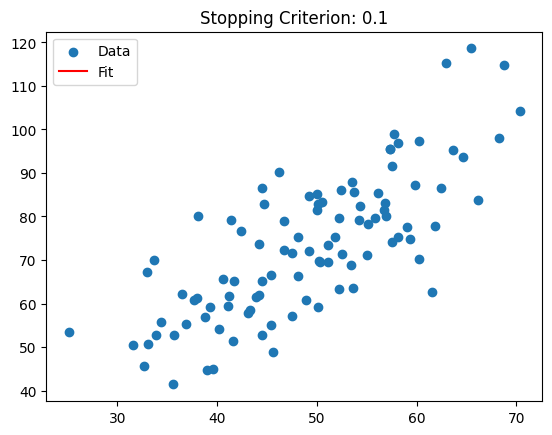

<ipython-input-23-49bef05840c1>:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
<ipython-input-23-49bef05840c1>:40: RuntimeWarning: invalid value encountered in add
  weights = weights + 2 * alpha * inv_N * np.dot(X.T,(y - y_hat))


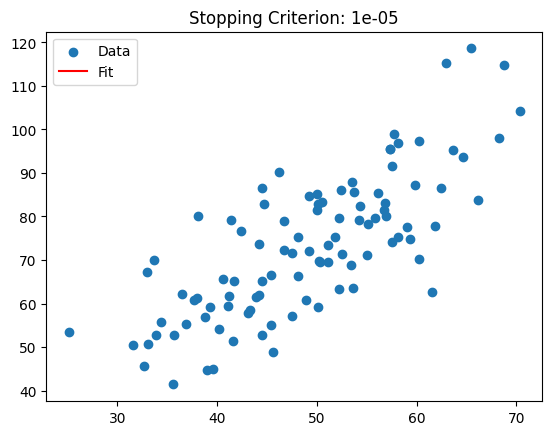

<ipython-input-23-49bef05840c1>:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
<ipython-input-23-49bef05840c1>:40: RuntimeWarning: invalid value encountered in add
  weights = weights + 2 * alpha * inv_N * np.dot(X.T,(y - y_hat))


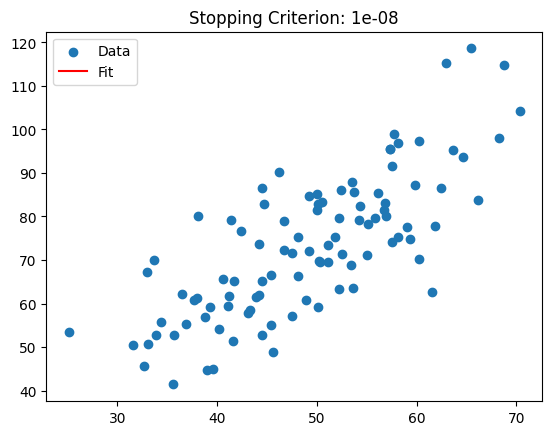

In [24]:

def plot_results(X, y, weights, title):
    y_hat = np.dot(PolynomialFeatures(1).fit_transform(X), weights)
    plt.scatter(X, y, label='Data')
    plt.plot(X, y_hat, color='red', label='Fit')
    plt.title(title)
    plt.legend()
    plt.show()




alphas = [0.01, 0.001, 0.00001]
epochs_list = [10, 100, 1000]
epsilons = [1e-1, 1e-5, 1e-8]

# Testing Learning Rates
print("Testing Different Learning Rates:")
for alpha in alphas:
    weights = gradient_descent(alpha, 1000, 1e-5, X, y)
    plot_results(X, y, weights, title=f'Learning Rate: {alpha}')

# Testing Epochs
print("Testing Different Epochs:")
for epochs in epochs_list:
    weights = gradient_descent(0.001, epochs, 1e-5, X, y)
    plot_results(X, y, weights, title=f'Epochs: {epochs}')

# Testing Stopping Criterion
print("Testing Different Stopping Criteria:")
for epsilon in epsilons:
    weights = gradient_descent(0.001, 1000, epsilon, X, y)
    plot_results(X, y, weights, title=f'Stopping Criterion: {epsilon}')

**1. Learning Rate**

When the learning rate was too high, the algorithm encountered RuntimeWarning errors (invalid value encountered) during weight updates and gradient norm calculations.
Convergence was not achieved for excessively high or low learning rates.
The learning rate significantly influences the stability of the gradient descent process.

**2. Number of Epochs**

With insufficient epochs (e.g., fewer than 100), the algorithm stopped prematurely, often before convergence could be achieved.
Increasing the number of epochs improved the likelihood of convergence.
An excessive number of epochs without proper stopping criteria wastes resources, while too few epochs prevent the model from learning.

**3. Stopping Criterion**

A loose stopping criterion (high 𝜖) caused the algorithm to halt prematurely, leading to suboptimal weight estimates.
A strict stopping criterion (low 𝜖) allowed the algorithm to continue until convergence, but sometimes led to numerical instabilities when combined with high learning rates or large numbers of epochs.


### Exercise 3: Comparison with closed form solution
Use your code from lab 1 or the demo used in the course to implement the closed form solution for linear regression.

Weights computed (closed-form solution with scikit-learn):
w0 (bias) = [9.90860619]
w (coefficients) = [[1.28735737]]


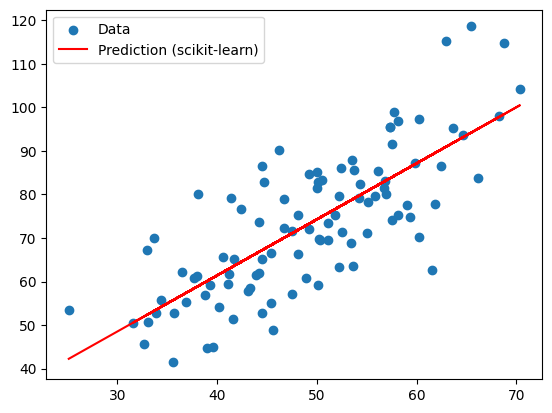

In [25]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Extract weights (parameters)
w0 = model.intercept_  # Intercept (bias term)
w = model.coef_        # Coefficients for the features

print("Weights computed (closed-form solution with scikit-learn):")
print(f"w0 (bias) = {w0}")
print(f"w (coefficients) = {w}")

# Make predictions
y_hat_sklearn = model.predict(X)

# Plot the data and the prediction
plt.scatter(X, y, label="Data")
plt.plot(X, y_hat_sklearn, color="red", label="Prediction (scikit-learn)")
plt.legend()
plt.show()


### Question 2: Comparison
What are the differences between the results obtained with gradient descent and with the closed form solution.

**Speed:** The LinearRegression method uses the closed-form solution, making it faster for small datasets.

**Accuracy:** The closed-form solution provides the exact optimal parameters without depending on hyperparameters like the learning rate or number of iterations.

**Ease of Use:** scikit-learn simplifies the implementation significantly compared to manually coding gradient descent or the normal equation.

### Bonus
Implement gradient descent using mini-batch and stochastic gradient descent.

In [26]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def mini_batch_gradient_descent(X, y, alpha=0.01, epochs=100, batch_size=32, epsilon=1e-6):
    """
    Mini-batch gradient descent for linear regression.

    Inputs:
    X - Feature matrix (N x D)
    y - Target vector (N x 1)
    alpha - Learning rate
    epochs - Number of iterations
    batch_size - Size of the mini-batch
    epsilon - Convergence threshold

    Outputs:
    weights - Optimized weights (D + 1 x 1)
    """
    # Add bias column to X
    X = PolynomialFeatures(1).fit_transform(X)

    N, D = X.shape
    weights = np.zeros((D, 1))
    inv_batch_size = 1 / batch_size
    prev_gradient_norm = 0

    for epoch in range(epochs):
        # Shuffle the dataset
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, N, batch_size):
            # Create a mini-batch
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Compute predictions
            y_hat = np.dot(X_batch, weights)

            # Compute the gradient
            gradient = -2 * inv_batch_size * np.dot(X_batch.T, (y_batch - y_hat))
            gradient_norm = np.linalg.norm(gradient)

            # Stopping criterion
            if np.abs(gradient_norm - prev_gradient_norm) <= epsilon:
                return weights

            # Update weights
            weights -= alpha * gradient

            prev_gradient_norm = gradient_norm

    return weights


In [27]:
def stochastic_gradient_descent(X, y, alpha=0.01, epochs=100, epsilon=1e-6):
    """
    Stochastic gradient descent for linear regression.

    Inputs:
    X - Feature matrix (N x D)
    y - Target vector (N x 1)
    alpha - Learning rate
    epochs - Number of iterations
    epsilon - Convergence threshold

    Outputs:
    weights - Optimized weights (D + 1 x 1)
    """
    # Add bias column to X
    X = PolynomialFeatures(1).fit_transform(X)

    N, D = X.shape
    weights = np.zeros((D, 1))
    prev_gradient_norm = 0

    for epoch in range(epochs):
        for i in range(N):
            # Select a single data point
            X_i = X[i:i+1]
            y_i = y[i:i+1]

            # Compute predictions
            y_hat = np.dot(X_i, weights)

            # Compute the gradient
            gradient = -2 * np.dot(X_i.T, (y_i - y_hat))
            gradient_norm = np.linalg.norm(gradient)

            # Stopping criterion
            if np.abs(gradient_norm - prev_gradient_norm) <= epsilon:
                return weights

            # Update weights
            weights -= alpha * gradient

            prev_gradient_norm = gradient_norm

    return weights


In [29]:
# Set hyperparameters
alpha = 0.0001
epochs = 1000
batch_size = 16

# Run Mini-Batch Gradient Descent
weights_mini_batch = mini_batch_gradient_descent(X, y, alpha, epochs, batch_size)
print("Weights from Mini-Batch Gradient Descent:", weights_mini_batch)

# Run Stochastic Gradient Descent
weights_sgd = stochastic_gradient_descent(X, y, alpha, epochs)
print("Weights from Stochastic Gradient Descent:", weights_sgd)


Weights from Mini-Batch Gradient Descent: [[0.47071766]
 [1.48619438]]
Weights from Stochastic Gradient Descent: [[5.84180293]
 [1.44604602]]
